In [1]:
#!pip install --upgrade fused

In [1]:
import fused
import numpy as np

fused._env('prod')
fused.options.show.show_widget = False
fused.options.request_timeout = 180

In [2]:
fused.__version__

'1.8.0'

In [125]:
from fused import NotebookCredentials
credentials = NotebookCredentials()


Please open this link to authenticate with Fused:

* [https://dev-tjcykxcetrz6bps6.us.auth0.com/authorize?audience=fused-python-api&scope=openid+email+name+offline_access&response_type=code&client_id=CXiwKZQmmyo0rqXZY7pzBgfsF7AL2A9l&redirect_uri=https%3A%2F%2Fwww.fused.io%2Fnotebook_login_redirect&code_challenge_method=S256&code_challenge=EPMCRShSS6hT0tLlsJz0tnmPiMYxD20yWbxpso_YHXg](https://dev-tjcykxcetrz6bps6.us.auth0.com/authorize?audience=fused-python-api&scope=openid+email+name+offline_access&response_type=code&client_id=CXiwKZQmmyo0rqXZY7pzBgfsF7AL2A9l&redirect_uri=https%3A%2F%2Fwww.fused.io%2Fnotebook_login_redirect&code_challenge_method=S256&code_challenge=EPMCRShSS6hT0tLlsJz0tnmPiMYxD20yWbxpso_YHXg)

Once you have logged in, that page will give you a code which you can paste into this notebook to finish logging in.


In [126]:
credentials.finalize(code="cfUXuTxAewA9FJZQWhkr5Yb4yAdEplQ2RhW8RlNjr5CBa")

You are now logged in to Fused. :rocket:

### choose a bounding box

In [3]:
test_bbox = [-120.485537,34.879334,-120.400163,34.951613] #from https://boundingbox.klokantech.com/, choose csv and copy

In [4]:
%%time
udf_cdl = fused.load("gabriel@fused.io/CDL_mask")
cdl_arr = fused.run(udf=udf_cdl,west=str(test_bbox[0]), south=str(test_bbox[1]),  east=str(test_bbox[2]), north=str(test_bbox[3]))
#cdl_arr = fused.run(udf=udf_cdl,west="-121.4864702361", south="37.8985667617",  east="-121.182286632", north="38.0465805862") #farmland near Stockton

CPU times: user 116 ms, sys: 66.1 ms, total: 182 ms
Wall time: 4.34 s


In [5]:
cdl_arr.image #xarray data type

<xarray.DataArray 'image' (band: 1, y: 1962, x: 1896)>
[3719952 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
    xc           (y, x) float64 -60.24 -60.24 -60.24 ... -2.363e+05 -2.363e+05
    yc           (y, x) float64 17.48 17.48 17.48 ... 6.856e+04 6.856e+04
    spatial_ref  int64 0
Dimensions without coordinates: y, x
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
cdl_img = np.transpose(np.array(cdl_arr.image[0:3],'uint8'),(1,2,0))
np.unique(cdl_img)

array([  1,   2,   3,   4,  21,  22,  24,  27,  28,  33,  36,  37,  42,
        43,  44,  46,  49,  51,  54,  58,  61,  66,  67,  68,  69,  71,
        72,  75,  76, 111, 121, 122, 123, 124, 131, 141, 142, 143, 152,
       176, 190, 195, 204, 205, 206, 208, 209, 210, 211, 212, 213, 216,
       217, 220, 221, 225, 226, 228, 236, 237, 242], dtype=uint8)

In [7]:
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

print(rgb_to_hex(255, 165, 1))

#ffa501


In [8]:
import pandas as pd
#df_cdl = pd.read_csv('/home/gabriel/Downloads/CDL_codes_names_colors.csv',header = None,index_col=1)
df_cdl = pd.read_csv('/Users/gabriela.durkin/Downloads/CDL_codes_names_colors.csv',header = None,index_col=1)
df_cdl = df_cdl.reset_index()
df_cdl.columns = ['name','code', 'R', 'G','B']
df_cdl = df_cdl[(df_cdl['name']!=' ')&(df_cdl['name'].notna())]
df_cdl = df_cdl.iloc[1:]
df_cdl = df_cdl.fillna(0).apply(pd.to_numeric, errors='ignore')
df_cdl=df_cdl.set_index('code',drop=True)

df_cdl['rgb'] = list(zip(df_cdl.R, df_cdl.G,df_cdl.B))
df_cdl['hex'] = df_cdl.apply(lambda x: rgb_to_hex(x.R,x.G,x.B),1)
dict_cdl = df_cdl['rgb'].to_dict()
dict_cdl_names = df_cdl['name'].to_dict()
dict_color_names = df_cdl.set_index('rgb')['name'].to_dict()
dict_name_hex = df_cdl.set_index('name')['hex'].to_dict()
dict_codes_names = {v:k for k,v in dict_cdl_names.items()}
dict_codes_names['Pumpkins'], dict_codes_names['Cherries']

/var/folders/1m/wqgwtpsx51qd271pv9zb6s7c0000gn/T/ipykernel_10424/3666666166.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cdl = df_cdl.fillna(0).apply(pd.to_numeric, errors='ignore')


(229, 66)

In [9]:
simple_dict = {'Alfalfa': 'OA',
 'Almonds': 'OA',
 'Apples': 'OA',
 'Barley': 'OA',
 'Barren': 'OT',
 'Carrots': 'OA',
 'Cherries': 'OA',
 'Chick Peas': 'OA',
 'Citrus': 'OA',
 'Clover/Wildflowers': 'OL',
 'Corn': 'CO',
 'Cotton': 'OA',
 'Cucumbers': 'OA',
 'Dbl Crop Barley/Corn': 'CO',
 'Dbl Crop Oats/Corn': 'CO',
 'Dbl Crop Triticale/Corn': 'CO',
 'Dbl Crop WinWht/Corn': 'CO',
 'Deciduous Forest': 'FW',
 'Developed/High Intensity': 'DV',
 'Developed/Low Intensity': 'DV',
 'Developed/Med Intensity': 'DV',
 'Developed/Open Space': 'DV',
 'Dry Beans': 'OA',
 'Evergreen Forest': 'FW',
 'Fallow/Idle Cropland': 'OL',
 'Garlic': 'OA',
 'Grapes': 'OA',
 'Grass/Pasture': 'OL',
 'Herbaceous Wetlands': 'FW',
 'Herbs': 'OA',
 'Lettuce': 'OA',
 'Misc Vegs & Fruits': 'OA',
 'Mixed Forest': 'FW',
 'Oats': 'OA',
 'Olives': 'OA',
 'Onions': 'OA',
 'Open Water': 'OW',
 'Other Crops': 'OA',
 'Other Hay/Non Alfalfa': 'OA',
 'Other Tree Crops': 'OA',
 'Peaches': 'OA',
 'Pears': 'OA',
 'Peas': 'OA',
 'Pecans': 'OA',
 'Peppers': 'OA',
 'Pistachios': 'OA',
 'Plums': 'OA',
 'Pop or Orn Corn': 'CO',
 'Prunes': 'OA',
 'Pumpkins': 'OA',
 'Rice': 'OA',
 'Rye': 'OA',
 'Safflower': 'OA',
 'Shrubland': 'OL',
 'Sod/Grass Seed': 'OL',
 'Sorghum': 'OA',
 'Squash': 'OA',
 'Strawberries': 'OA',
 'Sunflower': 'OA',
 'Sweet Corn': 'CO',
 'Sweet Potatoes': 'OA',
 'Tomatoes': 'OA',
 'Triticale': 'WH',
 'Walnuts': 'OA',
 'Watermelons': 'OA',
 'Winter Wheat': 'WH',
 'Woody Wetlands': 'FW',
 'Background': 'BG',
 'Soybeans': 'SB',
 'Peanuts': 'OA',
 'Tobacco': 'OA',
 'Mint': 'OA',
 'Durum Wheat': 'WH',
 'Spring Wheat': 'WH',
 'Other Small Grains': 'OA',
 'Dbl Crop WinWht/Soybeans': 'OA',
 'Millet': 'OA',
 'Speltz': 'OA',
 'Canola': 'OA',
 'Flaxseed': 'OA',
 'Rape Seed': 'OA',
 'Mustard': 'OA',
 'Camelina': 'OA',
 'Buckwheat': 'OA',
 'Sugarbeets': 'OA',
 'Potatoes': 'OA',
 'Sugarcane': 'OA',
 'Lentils': 'OA',
 'Caneberries': 'OA',
 'Hops': 'OA',
 'Switchgrass': 'OL',
 'Forest': 'FW',
 'Christmas Trees': 'OA',
 'Clouds/No Data': 'BG',
 'Developed': 'DV',
 'Water': 'OW',
 'Wetlands': 'FW',
 'Nonag/Undefined': 'BG',
 'Aquaculture': 'OW',
 'Perennial Ice/Snow ': 'BG',
 'Asparagus': 'OA',
 'Cantaloupes': 'OA',
 'Oranges': 'OA',
 'Honeydew Melons': 'OA',
 'Broccoli': 'OA',
 'Avocados': 'OA',
 'Pomegranates': 'OA',
 'Nectarines': 'OA',
 'Greens': 'OA',
 'Apricots': 'OA',
 'Vetch': 'OA',
 'Dbl Crop Lettuce/Durum Wht': 'OA',
 'Dbl Crop Lettuce/Cantaloupe': 'OA',
 'Dbl Crop Lettuce/Cotton': 'OA',
 'Dbl Crop Lettuce/Barley': 'OA',
 'Dbl Crop Durum Wht/Sorghum': 'OA',
 'Dbl Crop Barley/Sorghum': 'OA',
 'Dbl Crop WinWht/Sorghum': 'OA',
 'Dbl Crop WinWht/Cotton': 'OA',
 'Dbl Crop Soybeans/Cotton': 'OA',
 'Dbl Crop Soybeans/Oats': 'OA',
 'Dbl Crop Corn/Soybeans': 'OA',
 'Blueberries': 'OA',
 'Cabbage': 'OA',
 'Cauliflower': 'OA',
 'Celery': 'OA',
 'Radishes': 'OA',
 'Turnips': 'OA',
 'Eggplants': 'OA',
 'Gourds': 'OA',
 'Cranberries': 'OA',
 'Dbl Crop Barley/Soybeans': 'OA'}

In [10]:
simple_class_numeric_dict = {k:v for v,k in enumerate(['BG','OW','DV', 'CO','SB', 'WH','OA', 'FW', 'OL','OT'])}

In [11]:
rgb_dict = df_cdl[['rgb']].to_dict()['rgb']
def vec_translate(a, my_dict):
    return np.vectorize(my_dict.__getitem__)(a)
    
df_cdl['simple_class'] = df_cdl['name'].apply(lambda x: simple_dict[x] if x!=' ' else 'BG') 
df_cdl['simple_class_numeric'] = df_cdl['simple_class'].apply(lambda x: simple_class_numeric_dict[x]) 
code_class_dict = df_cdl[['simple_class_numeric']].to_dict()['simple_class_numeric']
#code_class_dict

###  download a false RGB color image of 3 of the sentinel 2 bands/indices in the same way

In [12]:
%%time

udf_s2 = fused.load("gabriel@fused.io/S2_3ch")

s2_arr = fused.run(udf=udf_s2,west=str(test_bbox[0]), south=str(test_bbox[1]),  east=str(test_bbox[2]), north=str(test_bbox[3]),
                   time_of_interest="2022-06-15/2022-07-03",
                   cloud_cover_perc="10",pixel_perc = "99"
                  )
s2_img = np.transpose(np.array(s2_arr.image[0:3],'uint8'),(1,2,0))

CPU times: user 91.2 ms, sys: 45.2 ms, total: 136 ms
Wall time: 3.96 s


/Users/gabriela.durkin/miniforge3/envs/aienv/lib/python3.11/site-packages/xarray/core/common.py:165: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self.values, dtype=dtype)


### now plot the two images side by side

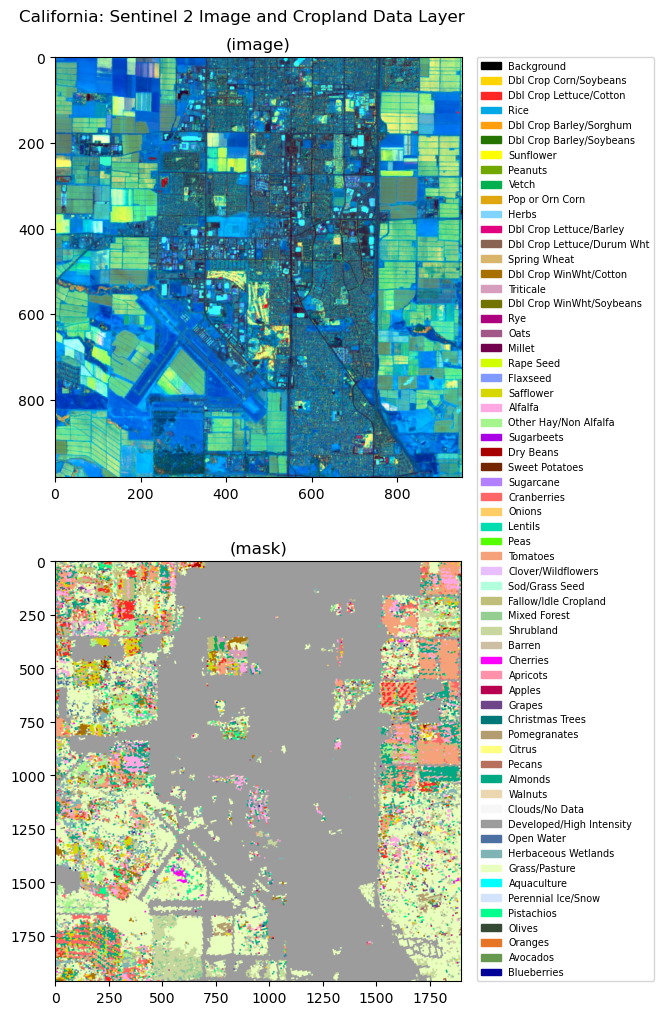

In [13]:
# Plotting the data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, ax = plt.subplots(2,1,figsize=(13,12), constrained_layout=False)

ax[0].imshow(s2_img)
ax[0].set_title('(image)')
#ax[1].imshow(cdl_img)
cdl_img_mapped = np.vectorize(dict_cdl.get)(cdl_img)
ax[1].imshow(np.squeeze(np.array(cdl_img_mapped)).transpose(1,2,0))
ax[1].set_title('(mask)')
plt.suptitle('California: Sentinel 2 Image and Cropland Data Layer', y=0.92)

add_handles = [mpatches.Patch(color=np.array(cl)/255.) for cl in dict_color_names.keys()]
label = dict_color_names.values()
ax[1].legend(add_handles, label, loc=(1.04, 0),prop={'size': 7})

plt.show()

### exploring datasets for hand-drawn bounding boxes

In [14]:
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON, LayersControl, Icon, Marker,basemap_to_tiles, Choropleth, MarkerCluster, Heatmap,SearchControl, FullScreenControl) 
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import shapely
import json

In [15]:
### following are some helper functions

In [16]:
def bounds_to_gdf(bounds_list, crs = 4326):
    box = shapely.box(*bounds_list)
    return gpd.GeoDataFrame(geometry=[box], crs=crs)

def run_async(fn, arr_args, delay=0, max_workers=None):
    import numpy as np
    import concurrent.futures
    import time 
    if max_workers is None:
        max_workers = min(len(arr_args), 32)
    pool = concurrent.futures.ThreadPoolExecutor(max_workers=max_workers)
    def delayed_fn(*args, **kwargs):
        time.sleep(delay * np.random.random())
        return fn(*args, **kwargs)
    fn2 = fn if delay == 0 else delayed_fn
    return [r for r in pool.map(fn2, arr_args)]

def poly_fill(geom, zooms=[15], compact=True, k=None):
    import mercantile
    import shapely
    import geopandas as gpd
    tile_list = list(mercantile.tiles(*geom.bounds,zooms=zooms))
    gdf_tiles = gpd.GeoDataFrame(tile_list, geometry=[shapely.box(*mercantile.bounds(i)) for i in tile_list], crs=4326)
    gdf_tiles_intersecting = gdf_tiles[gdf_tiles.intersects(geom)]
    if k: 
        temp_list = gdf_tiles_intersecting.apply(lambda row:mercantile.Tile(row.x,row.y,row.z),1)
        clip_list = k_ring_list(temp_list,k)
        if not compact:
            gdf = gpd.GeoDataFrame(clip_list, geometry=[shapely.box(*mercantile.bounds(i)) for i in clip_list], crs=4326)
            return gdf
    else:
        if not compact:
            return gdf_tiles_intersecting
        clip_list = gdf_tiles_intersecting.apply(lambda row:mercantile.Tile(row.x,row.y,row.z),1)
    simple_list = mercantile.simplify(clip_list)
    gdf = gpd.GeoDataFrame(simple_list, geometry=[shapely.box(*mercantile.bounds(i)) for i in simple_list], crs=4326)
    return gdf#.reset_index(drop=True)

def k_ring(tile, k):
    #ToDo: Remove invalid tiles in the globe boundries (e.g. negative values)
    import mercantile
    result = []
    for x in range(tile.x - k, tile.x + k + 1):
        for y in range(tile.y - k, tile.y + k + 1):
            result.append(mercantile.Tile(x, y, tile.z))
    return result

def k_ring_list(tiles, k):
    a = []
    for tile in tiles:
        a.extend(k_ring(tile, k))
    return list(set(a))
    
def make_tiles_gdf(bounds,zoom = 14):
    df_tiles = poly_fill(shapely.box(*bounds), zooms=[zoom], compact=0, k=k_ring_count)
    df_tiles['bounds'] = df_tiles['geometry'].apply(lambda x:x.bounds,1)
    return df_tiles

def buffer_bounds(bounds,buffer=0.0000):
    return [(1.-buffer)*bounds[0],(1.-buffer)*bounds[1],(1.+buffer)*bounds[2],(1.+buffer)*bounds[3]]

udf_s2 = fused.load("gabriel@fused.io/S2_3ch")

def call_bounded_udf(fused_udf,bounds):
    return fused.run(udf=fused_udf,
                                west=bounds[0], south=bounds[1], east = bounds[2], north = bounds[3])



In [17]:
def bounded_udf_fusion(bounds,year="2022",zoom="15",time_of_interest="2022-07-01/2022-07-14",
                    cloud_cover_perc="5",
                     pixel_perc = "95"):
    return fused.core.run_file("gabriel@fused.io", "S2_CDL_fusion", 
                                west=bounds[0], south=bounds[1], east = bounds[2], north = bounds[3],
                                zoom = zoom,
                                year=year,time_of_interest=time_of_interest,cloud_cover_perc = cloud_cover_perc, pixel_perc = pixel_perc)
    
def bounds_to_fusion(drawn_bounds):
    cdl_xarr = bounded_udf_fusion(drawn_bounds)
    cdl_img = np.transpose(np.array(cdl_xarr.image[0:4],'uint8'),(1,2,0))
    return cdl_img, drawn_bounds

In [18]:
import geopandas as gpd
import rasterio
from rasterio.transform import from_gcps
from rasterio.control import GroundControlPoint as GCP
from rasterio.warp import reproject, Resampling
import PIL
from io import StringIO, BytesIO
from base64 import b64encode

def reproject_raster(arr,bounds, crs_in = 4326, crs_out = 3857):
    #arr = np.squeeze(arr)
    bbox_src = bounds_to_gdf(bounds, crs = crs_in)
    bbox_dest = bounds_to_gdf(bounds, crs = crs_out)
    with rasterio.Env():
        ul = (bounds[0], bounds[3])  # in lon, lat / x, y order
        ll = (bounds[0], bounds[1])
        ur = (bounds[2], bounds[3])
        lr = (bounds[2], bounds[1])
        #print('input shape:',arr.shape)
        rows, cols, depth = arr.shape
        
        gcps = [
            GCP(0, 0, *ul),
            GCP(0, cols, *ur),
            GCP(rows, 0, *ll),
            GCP(rows, cols, *lr)
        ]
        
        src_transform = from_gcps(gcps)
        #{'init': 'EPSG:4326'}
        source = np.squeeze(arr)
    
        dst_crs = crs_out #{'init': 'EPSG:3857'}
        dst_transform, width, height = rasterio.warp.calculate_default_transform(crs_in, crs_out, cols, rows, *bbox_dest.total_bounds)
        if depth ==1:
            dst_shape =  height, width
        else:
            dst_shape =  max(rows,height), max(width,cols), depth
        #print('destination shape:',dst_shape)
        destination = np.zeros(dst_shape)
    
        reproject(
            source,
            destination,
            src_transform=src_transform,
            src_crs=crs_in,
            dst_transform=dst_transform,
            dst_crs=crs_out,
            resampling=Resampling.nearest)
    
    arr_web = destination
    return arr_web


def array_to_PIL(arr,code_dict,mapping=True):
    arr= np.where(np.isfinite(arr), arr, 0)
    if mapping:
        arr_mapped = np.vectorize(code_dict.get)(arr)
        arr_mapped =np.squeeze(np.array(arr_mapped)).transpose(1,2,0)
    else:
        arr_mapped = arr
    return PIL.Image.fromarray(np.uint8(arr_mapped), mode='RGB')

def PIL_to_url(pil_img):
    f = BytesIO()
    pil_img.save(f, 'png')
    data = b64encode(f.getvalue())
    data = data.decode('ascii')
    imgurl = 'data:image/png;base64,' + data
    return imgurl

In [19]:
#!pip install leafmap

### can get bounds from https://boundingbox.klokantech.com/

In [20]:
drawn_bounds_init = test_bbox
#[-121.4864702361,37.8985667617,-121.182286632,38.0465805862] #initial bounding box
poli =bounds_to_gdf(drawn_bounds_init, crs = 4326)

drawn_bounds = drawn_bounds_init

def handle_draw(self, action, geo_json):
    global poli 
    my_poly=dc.last_draw['geometry']['coordinates'][0]
    geom = Polygon(my_poly)
    poli = gpd.GeoDataFrame(geometry=[geom])

def bbox_coords():
    try:
        return list(poli.geometry[0].bounds)
    except Exception as e:
        print(e)
        print('draw a bbox on map')

bbox_coords()

[-120.485537, 34.879334, -120.400163, 34.951613]

In [21]:
cdl_xarr = call_bounded_udf(udf_cdl,test_bbox)
cdl_img = np.transpose(np.array(cdl_xarr.image[0:3],'uint8'),(1,2,0))
cdl_mercator = reproject_raster(cdl_img,test_bbox, crs_in = 4326, crs_out = 3857)
cdl_PIL = array_to_PIL(cdl_mercator,dict_cdl,mapping=True)
cdlimgurl = PIL_to_url(cdl_PIL)
cdlimgurl[0:100]

'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB2oAAAeoCAIAAABr/8dyAAEAAElEQVR4nOz9f3Rc5X0v+n9EjENG6i'

In [22]:
#test_bounds = [-122.34272, 38.006936, -122.101364, 38.155838]

/Users/gabriela.durkin/miniforge3/envs/aienv/lib/python3.11/site-packages/xarray/core/common.py:165: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self.values, dtype=dtype)


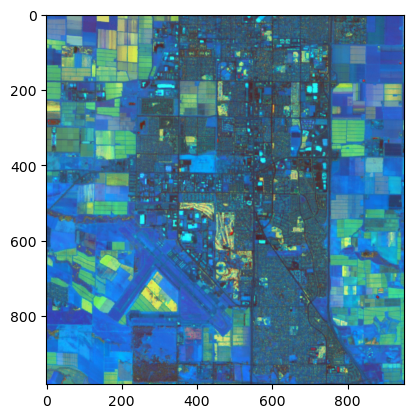

In [23]:
s2_xarr = call_bounded_udf(udf_s2,test_bbox)
s2_img = np.transpose(np.array(s2_xarr.image[0:3],'uint8'),(1,2,0))
plt.imshow(s2_img)
#mpl.image.imsave('rgb_layer.png', np.array(s2_img,'uint8'))

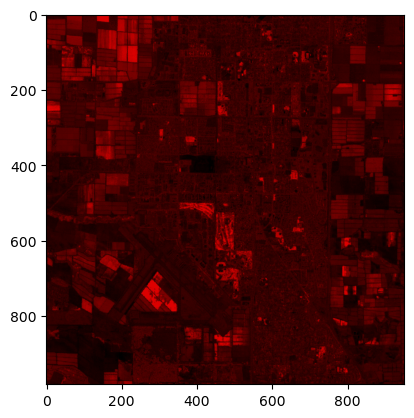

In [24]:
# Copy image so we don't mess up the original
import matplotlib as mpl
s2_img_red = s2_img.copy()
s2_img_red[..., [1,2]] = 0
plt.imshow(s2_img_red)
mpl.image.imsave('red_layer2.png', np.array(s2_img_red,'uint8'))

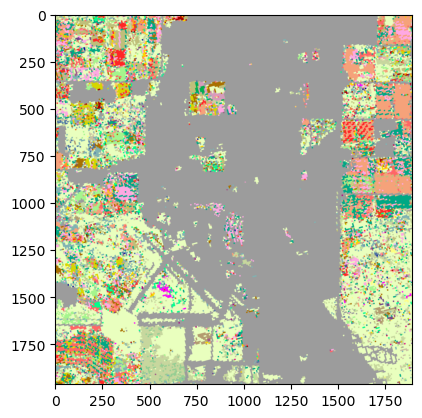

In [25]:
from PIL import Image
cdl_img_mapped = np.vectorize(dict_cdl.get)(cdl_img)
cdl_out = np.squeeze(np.array(cdl_img_mapped)).transpose(1,2,0)
plt.imshow(cdl_out)

In [26]:
# import matplotlib as mpl
# mpl.image.imsave('layer4_cdl.png', np.array(cdl_out,'uint8'))

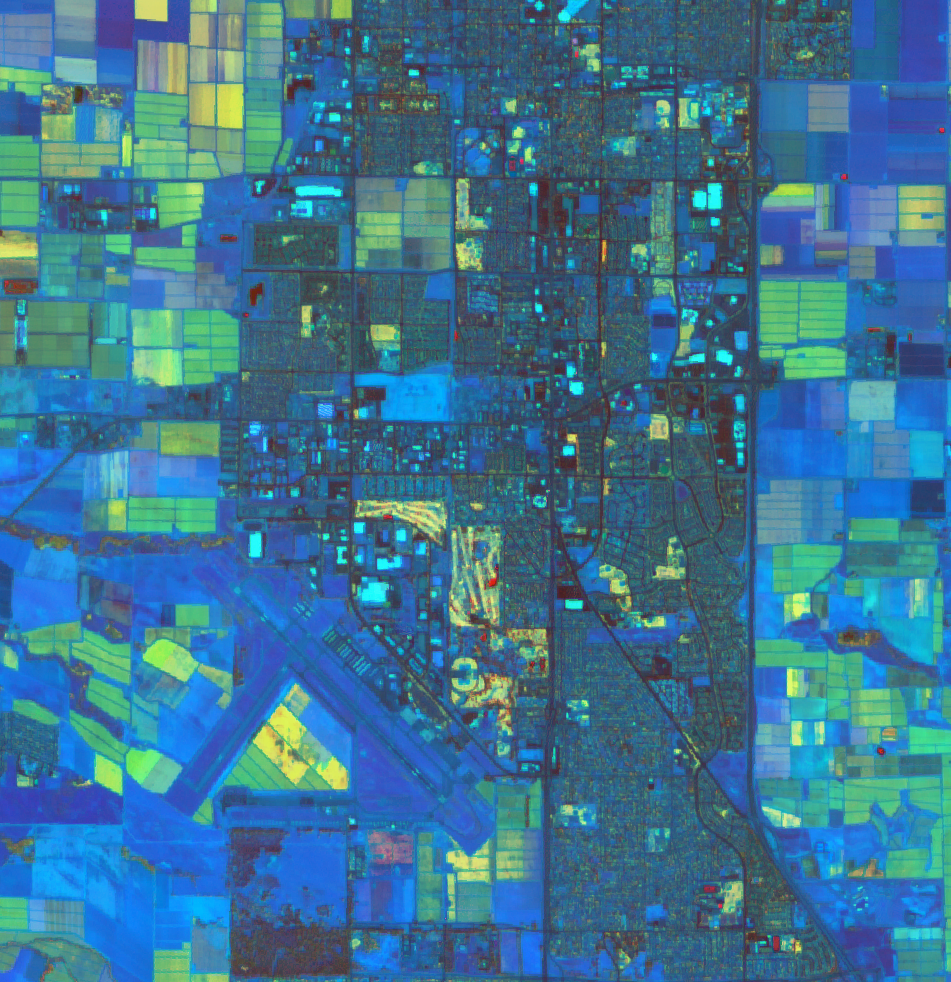

In [27]:
s2_mercator = reproject_raster(s2_img,test_bbox, crs_in = 4326, crs_out = 3857)
s2_PIL = array_to_PIL(s2_mercator,dict_cdl,mapping=False)
s2imgurl = PIL_to_url(s2_PIL)
s2_PIL

### below is a tiling of the sentinel 2 imagery and CDL using a split map in leafmap 

In [28]:
#!pip install leafmap

In [29]:
%%time
import warnings
warnings.filterwarnings('ignore')
import ipywidgets
import leafmap
import ipyleaflet
from ipyleaflet import Marker, basemaps, basemap_to_tiles, LegendControl, DrawControl, ImageOverlay, WMSLayer, FullScreenControl, GeoData, LayersControl, SearchControl, WidgetControl

from ipywidgets import IntSlider, ColorPicker, jslink, SelectionSlider, FloatSlider


from shapely.geometry.polygon import Polygon
import geopandas as gpd
import pandas as pd
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl, GeoJSON
zm_level = 14

carto_basemap=basemaps.CartoDB.Positron
drawn_bounds= bbox_coords()

center_bbox= 0.5*(drawn_bounds[1] + drawn_bounds[3]), 0.5*(drawn_bounds[0] + drawn_bounds[2])

m = leafmap.Map(basemap=carto_basemap, center=center_bbox, zoom=12, layout={'height':'1400px'},
    measure_control=False,
    fullscreen_control=False,
    attribution_control=False,
                draw_control=False,
                zoom_control = False,
               )

###########################################
# adding fullscreen toggle #
###########################################

m.add(FullScreenControl())


CDL_tile_layer = ipyleaflet.TileLayer(url="https://www.fused.io/server/v1/realtime-shared/14f00baf9149e49a4f89f33f3614ce4135dfc6682399c2d3c6bf029be3952bf9/run/tiles/{z}/{x}/{y}?dtype_out_raster=png&dtype_out_vector=csv",
    tile_size=256,
    zoom_offset=0,
    cross_origin=True,
    show_loading=True,
)

S2_tile_layer = ipyleaflet.TileLayer(
    url=f"https://www.fused.io/server/v1/realtime-shared/829b68e0e0caecccbafbd12906acdb7ec55fba45489795df37b259728970dce1/run/tiles/{{z}}/{{x}}/{{y}}",
    tile_size=256,
    zoom_offset=0,
    cross_origin=True,
    show_loading=True,
)


m.split_map(left_layer=CDL_tile_layer, right_layer=S2_tile_layer)

###########################################
# display output map and widgets #
###########################################
display(m)

Map(center=[34.915473500000004, -120.44284999999999], controls=(ZoomControl(options=['position', 'zoom_in_text…

CPU times: user 150 ms, sys: 47.6 ms, total: 198 ms
Wall time: 311 ms


In [30]:
def dataloader_fn(bounds,zoom =14):
    return fused.core.run_file("gabriel@fused.io", "data_loader", 
                                east=bounds[0], south=bounds[1], west = bounds[2], north = bounds[3],
                                zoom = zoom,
                                time_of_interest="2021-03-01/2021-09-13")

def k_ring(tile, k):
    #ToDo: Remove invalid tiles in the globe boundries (e.g. negative values)
    import mercantile
    result = []
    for x in range(tile.x - k, tile.x + k + 1):
        for y in range(tile.y - k, tile.y + k + 1):
            result.append(mercantile.Tile(x, y, tile.z))
    return result

def k_ring_list(tiles, k):
    a = []
    for tile in tiles:
        a.extend(k_ring(tile, k))
    return list(set(a))

def bounds_to_gdf(bounds_list, crs = 4326):
    box = shapely.box(*bounds_list)
    return gpd.GeoDataFrame(geometry=[box], crs=crs)

def poly_fill(geom, zooms=[15], compact=True, k=None):
    import mercantile
    import shapely
    import geopandas as gpd
    tile_list = list(mercantile.tiles(*geom.bounds,zooms=zooms))
    gdf_tiles = gpd.GeoDataFrame(tile_list, geometry=[shapely.box(*mercantile.bounds(i)) for i in tile_list], crs=4326)
    gdf_tiles_intersecting = gdf_tiles[gdf_tiles.intersects(geom)]
    if k: 
        temp_list = gdf_tiles_intersecting.apply(lambda row:mercantile.Tile(row.x,row.y,row.z),1)
        clip_list = k_ring_list(temp_list,k)
        if not compact:
            gdf = gpd.GeoDataFrame(clip_list, geometry=[shapely.box(*mercantile.bounds(i)) for i in clip_list], crs=4326)
            return gdf
    else:
        if not compact:
            return gdf_tiles_intersecting
        clip_list = gdf_tiles_intersecting.apply(lambda row:mercantile.Tile(row.x,row.y,row.z),1)
    simple_list = mercantile.simplify(clip_list)
    gdf = gpd.GeoDataFrame(simple_list, geometry=[shapely.box(*mercantile.bounds(i)) for i in simple_list], crs=4326)
    return gdf

def make_tiles_gdf(bounds,zoom = 14):
    df_tiles = poly_fill(shapely.box(*bounds), zooms=[zoom], compact=0, k=k_ring_count)
    df_tiles['bounds'] = df_tiles['geometry'].apply(lambda x:x.bounds,1)
    return df_tiles

In [31]:
def bounds_to_cdl_url(drawn_bounds):
    cdl_xarr = call_bounded_udf(udf_cdl,drawn_bounds)
    cdl_img = np.transpose(np.array(cdl_xarr.image[0:3],'uint8'),(1,2,0))
    cdl_mercator = reproject_raster(cdl_img,drawn_bounds, crs_in = 4326, crs_out = 3857)
    cdl_PIL = array_to_PIL(cdl_mercator,dict_cdl,mapping=True)
    cdlimgurl = PIL_to_url(cdl_PIL)
    bounds_list = [(drawn_bounds[1], drawn_bounds[0]), (drawn_bounds[3], drawn_bounds[2])]
    return cdlimgurl, bounds_list

In [32]:
# we can create empty containers that we fill as we move around the map harvesting tiles

In [33]:
feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}

url_list = []
tile_list = []

In [34]:
feature_collection

{'type': 'FeatureCollection', 'features': []}

In [35]:
len(tile_list)

0

In [36]:
len(url_list)

0

In [37]:
url_list[0]

IndexError: list index out of range

### don't draw polygons of more than 60,000 hectares, as this may be too many tiles to process at once

In [39]:
from shapely.geometry import shape
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, GeoData, ImageOverlay
zm_level = 14
k_ring_count = 0 

carto_basemap=basemaps.CartoDB.Positron
m = Map(basemap=carto_basemap, center=( 38.,-121.4), zoom=11,layer_control = True, layout={'height':'1000px'})
draw_control = DrawControl()

draw_control.circle = {
    "shapeOptions": {
        "fillColor": "#efed69",
        "color": "#efed69",
        "fillOpacity": 1.0
    }
}
draw_control.polygon = {
    "shapeOptions": {"weight": 0.5,
        "fillColor": "#6be5c3",
        "color": "green",
        "fillOpacity": 0.1
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Oups!"
    },
    "allowIntersection": False
}

draw_control.polyline =  {
    "shapeOptions": {
        "color": "green",
        "weight": 1.0,
        "opacity": 0.5
    }
}

draw_control.rectangle = {
    "shapeOptions": {"weight": 0.5,
        "color": "green", "fillOpacity": 0.1
    }
}

def handle_draw(self, action, geo_json, cumulative=True):
    global tile_list, url_list
    """Do something with the GeoJSON when it's drawn on the map"""    
    feature_collection['features'].append(geo_json)
    geom_list = [shape(feature_collection['features'][i]['geometry']) for i in range(len(feature_collection['features']))]
    gdf_shapes = gpd.GeoDataFrame({'geometry':geom_list})
    bounds_list = list(gdf_shapes.total_bounds)
    gdf_tiles = make_tiles_gdf(bounds_list,zoom = zm_level)
    gdf_tiles_shape = gdf_tiles.sjoin(gdf_shapes, how="inner")
    gdf_tiles_shape = gdf_tiles_shape.drop_duplicates('geometry')
    tile_list = list(set(tile_list))
    #if len(tile_list) < 200:
    tile_list += list(gdf_tiles_shape['bounds'].values)
    tile_list = list(set(tile_list))
    url_list =run_async(bounds_to_cdl_url, tile_list, delay=0., max_workers=300)
    # m.add(GeoData(geo_dataframe=gdf_tiles_shape,
    #                style={'color': 'green', 'fillColor': 'none', 'opacity':0.02, 'weight':1.5, 'dashArray':'2', 'fillOpacity':0.2},
    #                hover_style={'fillColor': 'green' , 'fillOpacity': 0.6},
    #                name = 'tiles'))
    if len(url_list)>0:
        for url_ex, bds in url_list:
            io_cdl = ImageOverlay(url=url_ex, bounds=bds, interactive= False,opacity = 0.9)
            m.add_layer(io_cdl) 
    
    
   


draw_control.on_draw(handle_draw)
m.add(LayersControl())
m.add_control(draw_control)
m

Map(center=[38.0, -121.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

### let's return only tiles that contain a particular crop ~ cherries

In [151]:
feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}
url_list = []
tile_list = []
testing_bounds_set = []

In [152]:
class_of_interest = dict_codes_names['Cherries']
class_of_interest

66

In [153]:
def bounds_to_cdl_classes(drawn_bounds):
    cdl_xarr = call_bounded_udf(udf_cdl,drawn_bounds)
    cdl_img = np.transpose(np.array(cdl_xarr.image[0:3],'uint8'),(1,2,0))
    class_codes = np.unique(cdl_img,return_counts = True)
    #bounds_list = [(drawn_bounds[1], drawn_bounds[0]), (drawn_bounds[3], drawn_bounds[2])]
    return dict(zip(class_codes[0],class_codes[1]))

In [154]:
#test_bounds = [-122.34272, 38.006936, -122.101364, 38.155838]

In [155]:
#bounds_to_cdl_classes(test_bounds)

In [156]:
from shapely.geometry import shape
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, GeoData
zm_level = 14
k_ring_count = 0 

carto_basemap=basemaps.CartoDB.Positron
m = Map(basemap=carto_basemap, center=( 38.,-121.4), zoom=11,layer_control = True, layout={'height':'800px'})
draw_control = DrawControl()

draw_control.circle = {
    "shapeOptions": {
        "fillColor": "#efed69",
        "color": "#efed69",
        "fillOpacity": 1.0
    }
}
draw_control.polygon = {
    "shapeOptions": {"weight": 0.5,
        "fillColor": "green",
        "color": "green",
        "fillOpacity": 0.1
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Oups!"
    },
    "allowIntersection": False
}

draw_control.polyline =  {
    "shapeOptions": {
        "color": "green",
        "weight": 1.0,
        "opacity": 0.5
    }
}

draw_control.rectangle = {
    "shapeOptions": {"weight": 0.5,
        "color": "green", "fillOpacity": 0.1
    }
}

def handle_draw(self, action, geo_json, cumulative=True):
    too_many = False
    global tile_list, url_list, testing_bounds_set
    """Do something with the GeoJSON when it's drawn on the map"""    
    feature_collection['features'].append(geo_json)
    geom_list = [shape(feature_collection['features'][i]['geometry']) for i in range(len(feature_collection['features']))]
    gdf_shapes = gpd.GeoDataFrame({'geometry':[geom_list[-1]]})
    bounds_list = list(gdf_shapes.total_bounds)
    gdf_tiles = make_tiles_gdf(bounds_list,zoom = zm_level)
    gdf_tiles_shape = gdf_tiles.sjoin(gdf_shapes, how="inner")
    gdf_tiles_shape = gdf_tiles_shape.drop_duplicates('geometry')
    bounds_list_shape = list(gdf_tiles_shape['bounds'].values)
    if len(bounds_list_shape)>300:
        too_many = True
        bounds_list_shape = bounds_list_shape[:300]
        gdf_tiles_shape = gdf_tiles_shape.iloc[:300]
        print('polygon too large, only pulling first 300 tiles')
    class_list= run_async(bounds_to_cdl_classes, bounds_list_shape, delay=1.3, max_workers=300)
    gdf_tiles_shape['class_values'] = [el.keys() for el in class_list]
    gdf_tiles_shape['class_sizes'] = class_list
    gdf_tiles_shape['diversity'] = gdf_tiles_shape.apply(lambda x: len(x['class_values']),1)
    gdf_tiles_shape['include'] = gdf_tiles_shape.apply(lambda x: class_of_interest in x['class_values'] and x['class_sizes'][class_of_interest]>2000 and x['diversity']>1,1)
    gdf_tiles_shape = gdf_tiles_shape[['geometry','include','bounds']]
    gdf_selected = gdf_tiles_shape[gdf_tiles_shape['include']]
    #if len(tile_list) < 200:
    tile_list += list(gdf_selected['bounds'].values)
    if len(tile_list)>300:
        tile_list = tile_list[-300:]
    tile_list = list(set(tile_list))
    url_list =run_async(bounds_to_cdl_url, tile_list, delay=1.4, max_workers=200)
    #m.add(GeoData(geo_dataframe=gdf_selected,
                   # style={'color': 'green', 'fillColor': 'green', 'opacity':0.2, 'weight':1.5, 'dashArray':'2', 'fillOpacity':0.2},
                   # hover_style={'fillColor': 'green' , 'fillOpacity': 0.6},
                   # name = 'selected_tiles'))
    if len(url_list)>0:
        for url_ex, bds in url_list:
            io_cdl = ImageOverlay(url=url_ex, bounds=bds, interactive= False,opacity = 0.9)
            m.add_layer(io_cdl) 
    testing_bounds_set += list(gdf_selected['bounds'].values)
    testing_bounds_set = list(set(testing_bounds_set))
    
    
   


draw_control.on_draw(handle_draw)
m.add(LayersControl())
m.add_control(draw_control)
m

Map(center=[38.0, -121.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

### missing tiles above are one without any cherries

In [45]:
len(set(tile_list))

213

### let's define a multiclass segmentation problem:

In [40]:
simple_dict = {'Alfalfa': 'OA',
 'Almonds': 'OA',
 'Apples': 'OA',
 'Barley': 'OA',
 'Barren': 'OT',
 'Carrots': 'OA',
 'Cherries': 'OA',
 'Chick Peas': 'OA',
 'Citrus': 'OA',
 'Clover/Wildflowers': 'OL',
 'Corn': 'CO',
 'Cotton': 'OA',
 'Cucumbers': 'OA',
 'Dbl Crop Barley/Corn': 'CO',
 'Dbl Crop Oats/Corn': 'CO',
 'Dbl Crop Triticale/Corn': 'CO',
 'Dbl Crop WinWht/Corn': 'CO',
 'Deciduous Forest': 'FW',
 'Developed/High Intensity': 'DV',
 'Developed/Low Intensity': 'DV',
 'Developed/Med Intensity': 'DV',
 'Developed/Open Space': 'DV',
 'Dry Beans': 'OA',
 'Evergreen Forest': 'FW',
 'Fallow/Idle Cropland': 'OL',
 'Garlic': 'OA',
 'Grapes': 'OA',
 'Grass/Pasture': 'OL',
 'Herbaceous Wetlands': 'FW',
 'Herbs': 'OA',
 'Lettuce': 'OA',
 'Misc Vegs & Fruits': 'OA',
 'Mixed Forest': 'FW',
 'Oats': 'OA',
 'Olives': 'OA',
 'Onions': 'OA',
 'Open Water': 'OW',
 'Other Crops': 'OA',
 'Other Hay/Non Alfalfa': 'OA',
 'Other Tree Crops': 'OA',
 'Peaches': 'OA',
 'Pears': 'OA',
 'Peas': 'OA',
 'Pecans': 'OA',
 'Peppers': 'OA',
 'Pistachios': 'OA',
 'Plums': 'OA',
 'Pop or Orn Corn': 'CO',
 'Prunes': 'OA',
 'Pumpkins': 'OA',
 'Rice': 'OA',
 'Rye': 'OA',
 'Safflower': 'OA',
 'Shrubland': 'OL',
 'Sod/Grass Seed': 'OL',
 'Sorghum': 'OA',
 'Squash': 'OA',
 'Strawberries': 'OA',
 'Sunflower': 'OA',
 'Sweet Corn': 'CO',
 'Sweet Potatoes': 'OA',
 'Tomatoes': 'OA',
 'Triticale': 'WH',
 'Walnuts': 'OA',
 'Watermelons': 'OA',
 'Winter Wheat': 'WH',
 'Woody Wetlands': 'FW',
 'Background': 'BG',
 'Soybeans': 'SB',
 'Peanuts': 'OA',
 'Tobacco': 'OA',
 'Mint': 'OA',
 'Durum Wheat': 'WH',
 'Spring Wheat': 'WH',
 'Other Small Grains': 'OA',
 'Dbl Crop WinWht/Soybeans': 'OA',
 'Millet': 'OA',
 'Speltz': 'OA',
 'Canola': 'OA',
 'Flaxseed': 'OA',
 'Rape Seed': 'OA',
 'Mustard': 'OA',
 'Camelina': 'OA',
 'Buckwheat': 'OA',
 'Sugarbeets': 'OA',
 'Potatoes': 'OA',
 'Sugarcane': 'OA',
 'Lentils': 'OA',
 'Caneberries': 'OA',
 'Hops': 'OA',
 'Switchgrass': 'OL',
 'Forest': 'FW',
 'Christmas Trees': 'OA',
 'Clouds/No Data': 'BG',
 'Developed': 'DV',
 'Water': 'OW',
 'Wetlands': 'FW',
 'Nonag/Undefined': 'BG',
 'Aquaculture': 'OW',
 'Perennial Ice/Snow ': 'BG',
 'Asparagus': 'OA',
 'Cantaloupes': 'OA',
 'Oranges': 'OA',
 'Honeydew Melons': 'OA',
 'Broccoli': 'OA',
 'Avocados': 'OA',
 'Pomegranates': 'OA',
 'Nectarines': 'OA',
 'Greens': 'OA',
 'Apricots': 'OA',
 'Vetch': 'OA',
 'Dbl Crop Lettuce/Durum Wht': 'OA',
 'Dbl Crop Lettuce/Cantaloupe': 'OA',
 'Dbl Crop Lettuce/Cotton': 'OA',
 'Dbl Crop Lettuce/Barley': 'OA',
 'Dbl Crop Durum Wht/Sorghum': 'OA',
 'Dbl Crop Barley/Sorghum': 'OA',
 'Dbl Crop WinWht/Sorghum': 'OA',
 'Dbl Crop WinWht/Cotton': 'OA',
 'Dbl Crop Soybeans/Cotton': 'OA',
 'Dbl Crop Soybeans/Oats': 'OA',
 'Dbl Crop Corn/Soybeans': 'OA',
 'Blueberries': 'OA',
 'Cabbage': 'OA',
 'Cauliflower': 'OA',
 'Celery': 'OA',
 'Radishes': 'OA',
 'Turnips': 'OA',
 'Eggplants': 'OA',
 'Gourds': 'OA',
 'Cranberries': 'OA',
 'Dbl Crop Barley/Soybeans': 'OA'}

In [41]:
df_cdl['simple_class'] = df_cdl['name'].apply(lambda x: simple_dict[x]) 

In [42]:
simple_class_numeric_dict = {k:v for v,k in enumerate(['BG','OW','DV', 'CO','SB', 'WH','OA', 'FW', 'OL','OT'])}

In [43]:
simple_class_numeric_dict

{'BG': 0,
 'OW': 1,
 'DV': 2,
 'CO': 3,
 'SB': 4,
 'WH': 5,
 'OA': 6,
 'FW': 7,
 'OL': 8,
 'OT': 9}

In [44]:
df_cdl['simple_class_numeric'] = df_cdl['simple_class'].apply(lambda x: simple_class_numeric_dict[x]) 

In [45]:
df_cdl[df_cdl['name'].str.contains('Water')]

,name,R,G,B,rgb,hex,simple_class,simple_class_numeric
code,,,,,,,,
48,Watermelons,255,102,102,"(255, 102, 102)",#ff6666,OA,6
83,Water,77,112,163,"(77, 112, 163)",#4d70a3,OW,1
111,Open Water,77,112,163,"(77, 112, 163)",#4d70a3,OW,1


In [46]:
df_cdl[df_cdl['name'].str.contains('Soy')]

,name,R,G,B,rgb,hex,simple_class,simple_class_numeric
code,,,,,,,,
5,Soybeans,38,115,0,"(38, 115, 0)",#267300,SB,4
26,Dbl Crop WinWht/Soybeans,115,115,0,"(115, 115, 0)",#737300,OA,6
239,Dbl Crop Soybeans/Cotton,38,115,0,"(38, 115, 0)",#267300,OA,6
240,Dbl Crop Soybeans/Oats,38,115,0,"(38, 115, 0)",#267300,OA,6
241,Dbl Crop Corn/Soybeans,255,212,0,"(255, 212, 0)",#ffd400,OA,6
254,Dbl Crop Barley/Soybeans,38,115,0,"(38, 115, 0)",#267300,OA,6


In [47]:
cdl_simple_class_dict = df_cdl[['simple_class_numeric']].to_dict()['simple_class_numeric']
#cdl_simple_class_dict

### harvest some chips around the USA (for our ML training set)

In [48]:
feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}
url_list = []
tile_list = []
training_bounds_set = []

In [60]:
from shapely.geometry import shape
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, GeoData, SearchControl, ImageOverlay
zm_level = 14
k_ring_count = 0 

carto_basemap=basemaps.CartoDB.Positron
m = Map(basemap=carto_basemap, center=( 38.,-121.4), zoom=11,layer_control = True, layout={'height':'800px'})


###########################################
# adding search bar #
###########################################
search = SearchControl(position="topleft", 
 url=
'https://nominatim.openstreetmap.org/search?format=json&q={s}', 
 zoom=10,
 property_name='display_name'
 )
m.add_control(search)

###########################################
# adding draw controls #
###########################################

draw_control = DrawControl()

draw_control.circle = {
    "shapeOptions": {
        "fillColor": "#efed69",
        "color": "#efed69",
        "fillOpacity": 1.0
    }
}
draw_control.polygon = {
    "shapeOptions": {"weight": 0.5,
        "fillColor": "green",
        "color": "green",
        "fillOpacity": 0.1
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Oups!"
    },
    "allowIntersection": False
}
draw_control.polyline =  {
    "shapeOptions": {
        "color": "green",
        "weight": 1.0,
        "opacity": 0.5
    }
}
draw_control.rectangle = {
    "shapeOptions": {"weight": 0.5,
        "color": "green", "fillOpacity": 0.1
    }
}
def handle_draw(self, action, geo_json, cumulative=True):
    global url_list, training_bounds_set
    """Do something with the GeoJSON when it's drawn on the map"""    
    feature_collection['features'].append(geo_json)
    geom_list = [shape(feature_collection['features'][i]['geometry']) for i in range(len(feature_collection['features']))]
    gdf_shapes = gpd.GeoDataFrame({'geometry':[geom_list[-1]]})
    bounds_list = list(gdf_shapes.total_bounds)
    gdf_tiles = make_tiles_gdf(bounds_list,zoom = zm_level)
    gdf_tiles_shape = gdf_tiles.sjoin(gdf_shapes, how="inner")
    gdf_tiles_shape = gdf_tiles_shape.drop_duplicates('geometry')
    #if len(tile_list) < 200:
    tile_list = list(gdf_tiles_shape['bounds'].values)
    tile_list = list(set(tile_list))
    if len(tile_list)>300:
        too_many = True
        tile_list = tile_list[:300]
        gdf_tiles_shape = gdf_tiles_shape.iloc[:300]
        print('polygon is too large, restricting to first 300 chips')
    url_list =run_async(bounds_to_cdl_url, tile_list, delay=0., max_workers=300)
    # m.add(GeoData(geo_dataframe=gdf_tiles_shape,
    #                style={'color': 'green', 'fillColor': 'none', 'opacity':0.02, 'weight':1.5, 'dashArray':'2', 'fillOpacity':0.2},
    #                hover_style={'fillColor': 'green' , 'fillOpacity': 0.6},
    #                name = 'tiles'))
    if len(url_list)>0:
        for url_ex, bds in url_list:
            io_cdl = ImageOverlay(url=url_ex, bounds=bds, interactive= False,opacity = 0.9)
            m.add_layer(io_cdl) 
    training_bounds_set += list(gdf_tiles_shape['bounds'].values)
    training_bounds_set = list(set(training_bounds_set))


draw_control.on_draw(handle_draw)
m.add_control(draw_control)
m

Map(center=[38.0, -121.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [61]:
len(training_bounds_set)

182

In [62]:
m.save('chip_map_test.html', title='Chip Map')

### we have accumulated a set of bounding boxes --> chips we want for ML

In [63]:
from sklearn.model_selection import train_test_split
bounds_train, bounds_test = train_test_split(training_bounds_set, test_size=0.15, random_state=42)

In [64]:
with open("CDL_bounds_tr.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable 
    # if the data is nested
    json.dump(bounds_train, f, indent=2) 

with open("CDL_bounds_ts.json", 'w') as f:
    json.dump(bounds_test, f, indent=2) 

In [65]:
with open("CDL_bounds_tr.json", 'r') as f:
    bounds_train = json.load(f)

with open("CDL_bounds_ts.json", 'r') as f:
    bounds_test = json.load(f)

In [66]:
len(bounds_train)

154

In [67]:
def vec_translate(a, my_dict):
    return np.vectorize(my_dict.__getitem__)(a)

def chip_loader_fn(bounds,zoom =15, time_of_interest="2022-06-01/2022-06-20",
                    cloud_cover_perc="5",
                     pixel_perc = "95",class_mapping = cdl_simple_class_dict):
    def try_udf():
        try:
            out = fused.core.run_file("gabriel@fused.io", "S2_CDL_fusion", 
                                east=bounds[0], south=bounds[1], west = bounds[2], north = bounds[3],
                                zoom = str(zoom),
                                year="2022",time_of_interest=time_of_interest,cloud_cover_perc = cloud_cover_perc, pixel_perc = pixel_perc)
        except:
            if int(zoom)==15:
                return np.zeros([486,486,3]), np.zeros([486,486])
            else:
                return np.zeros([243,243,3]), np.zeros([243,243])
        return out     
    output = try_udf()
    img4 = output.image
    npimg4 = np.array(img4)
    img = np.array(npimg4)[0:3].astype(int, casting="unsafe").transpose(1,2,0)
    mask = np.array(img4[3], dtype='uint8')
    mask = np.nan_to_num(mask, copy=True, nan=0.0, posinf=0.0, neginf=0.0)
    mask = np.array(mask).astype(int, casting="unsafe")
    mask= vec_translate(mask, class_mapping)
    return img, mask

### bounds --> chips

In [68]:
bounds_train[12]

[-121.376953125, 38.13455657705413, -121.35498046875, 38.15183740300677]

In [69]:
%%time
bounds_ex = bounds_train[1]
img, msk = chip_loader_fn(bounds_ex)

CPU times: user 53.1 ms, sys: 47.9 ms, total: 101 ms
Wall time: 52.3 s


In [70]:
plt.imshow(img)

NameError: name 'plt' is not defined

In [ ]:
plt.imshow(msk)

### upload the testing datasets to Hugginface

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()

### generating and saving training data

In [ ]:
%%time
from torchvision.transforms import v2

toPIL = v2.ToPILImage()
import warnings
import gc
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm_notebook
from time import sleep
batch_size = 50
from datasets import Dataset, concatenate_datasets

for i in tqdm_notebook(range(int(len(bounds_train)/batch_size))):
    try:
        train_dict = {}
        img_tensor_list = []
        mask_tensor_list = []
        in_memory_dataset = run_async(chip_loader_fn, bounds_train[i*batch_size:min((i+1)*batch_size,len(bounds_train))], delay=2.5, max_workers=200)
        img_mask_list = [list(t) for t in zip(*in_memory_dataset)]
        for img_arr in img_mask_list[0]:
            img_tensor_list += [toPIL(np.array(img_arr,'uint8'))]
        for mask in img_mask_list[1]:    
            mask_tensor_list += [toPIL(np.array(mask,'uint8'))]
        train_dict['pixel_values']  = img_tensor_list
        train_dict['labels']  = mask_tensor_list
        dataset_train = Dataset.from_dict(train_dict)
        if i ==0:
            big_dataset_train = dataset_train
        else:
            big_dataset_train = concatenate_datasets([dataset_train, big_dataset_train]) #big_dataset_train.add_item(dataset_entry)
        
    except Exception as e:
        #print(e)
        print('error batch number:',i)
        continue
    del dataset_train
    del in_memory_dataset
    gc.collect()
    sleep(5)

big_dataset_train.save_to_disk("/xxx/training_data_cdl_june")

In [190]:
#big_dataset_train.push_to_hub("gdurkin/cdl_training_hi_res_july")

In [38]:
from huggingface_hub import HfApi
api = HfApi()
from huggingface_hub import create_repo
create_repo("xxx/cdl_hi_res_june_train",repo_type='dataset')

RepoUrl('https://huggingface.co/datasets/gdurkin/cdl_hi_res_june_train', endpoint='https://huggingface.co', repo_type='dataset', repo_id='gdurkin/cdl_hi_res_june_train')

In [39]:
api.upload_folder(
    folder_path="/xxx/training_data_cdl_june",#path_in_repo="train", # Upload to a specific folder
    repo_id="xxx/cdl_hi_res_june_train",
    repo_type="dataset",
    #ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

data-00001-of-00002.arrow:   0%|          | 0.00/470M [00:00<?, ?B/s]

data-00000-of-00002.arrow:   0%|          | 0.00/471M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/datasets/gdurkin/cdl_hi_res_june_train/commit/01c770842049a98e0203fc6aa6f0c1f09f217c22', commit_message='Upload folder using huggingface_hub', commit_description='', oid='01c770842049a98e0203fc6aa6f0c1f09f217c22', pr_url=None, pr_revision=None, pr_num=None)

### generating and saving test data

In [40]:
%%time
toPIL = v2.ToPILImage()
import warnings
import gc
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm_notebook
from time import sleep
batch_size = 100
from datasets import Dataset, concatenate_datasets

for i in tqdm_notebook(range(int(len(bounds_test)/batch_size))):
    try:
        test_dict = {}
        img_tensor_list = []
        mask_tensor_list = []
        in_memory_dataset = run_async(chip_loader_fn, bounds_test[i*batch_size:min((i+1)*batch_size,len(bounds_test))], delay=1.5, max_workers=100)
        img_mask_list = [list(t) for t in zip(*in_memory_dataset)]
        for img_arr in img_mask_list[0]:
            img_tensor_list += [toPIL(np.array(img_arr,'uint8'))]
        for mask in img_mask_list[1]:    
            mask_tensor_list += [toPIL(np.array(mask,'uint8'))]
        test_dict['pixel_values']  = img_tensor_list
        test_dict['labels']  = mask_tensor_list
        dataset_test = Dataset.from_dict(test_dict)
        if i == 0:
            big_dataset_test = dataset_test
        else:
            big_dataset_test = concatenate_datasets([dataset_test, big_dataset_test]) #big_dataset_test.add_item(dataset_entry)
        
    except Exception as e:
        #print(e)
        print('error batch number:',i)
        continue
    del dataset_test
    del in_memory_dataset
    gc.collect()
    sleep(5)
    
big_dataset_test.save_to_disk("/xxx/testing_data_cdl_june")
#big_dataset_test.push_to_hub("gdurkin/cdl_testing_hi_res_july")

  0%|          | 0/15 [00:00<?, ?it/s]

Saving the dataset (0/1 shards):   0%|          | 0/1500 [00:00<?, ? examples/s]

CPU times: user 1min 38s, sys: 15.3 s, total: 1min 53s
Wall time: 13min 7s


In [41]:
from huggingface_hub import create_repo
create_repo("xxx/cdl_hi_res_june_test",repo_type='dataset')

RepoUrl('https://huggingface.co/datasets/gdurkin/cdl_hi_res_june_test', endpoint='https://huggingface.co', repo_type='dataset', repo_id='gdurkin/cdl_hi_res_june_test')

In [3]:
big_dataset_test.push_to_hub("xxx/cdl_hi_res_june_test")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/15 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/gdurkin/cdl_hi_res_june_test/commit/cb9d30aed5798f9e8794b3c4d453c587d911cf60', commit_message='Upload dataset', commit_description='', oid='cb9d30aed5798f9e8794b3c4d453c587d911cf60', pr_url=None, pr_revision=None, pr_num=None)

In [2]:
from datasets import load_from_disk, load_dataset
big_dataset_test = load_from_disk("/xxx/testing_data_cdl_june")

In [41]:
#!pip install -U datasets

In [15]:
dataset_test = load_dataset("xxx/cdl_hi_res_may_test")['train']

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [16]:
dataset_test['pixel_values'][3].size

(486, 486)

In [33]:
big_dataset_test['pixel_values'][3].size

(486, 486)